In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import torch.nn as tnn
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cpu


In [4]:
# motif = 'AGGAACCTA'
motif = 'GATA'
# SELEX
x1, y1 = mb.datasets.simulate_xy(motif, n_trials=10000, seqlen=20, max_mismatches=5)
data = pd.DataFrame({'seq': x1, 'enr_approx': y1})
train_data = mb.tl.SelexDataset(data_frame=data)
train_loader = tdata.DataLoader(dataset=train_data, batch_size=256, shuffle=True)
test_loader = tdata.DataLoader(dataset=train_data, batch_size=1, shuffle=False)

In [10]:
net = mb.tl.NetworkDinuc().to(device)
optimiser = topti.Adam(net.parameters(), lr=0.001, weight_decay=0.0001)
#criterion = tnn.BCELoss()
#criterion = tnn.PoissonNLLLoss()
criterion = mb.tl.PoissonLoss()
loss_history = []

1.0


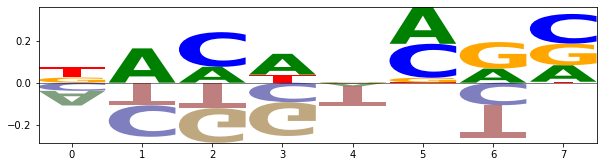

In [11]:
print(np.exp(net.log_weight_1.squeeze().cpu().detach().numpy()))
# print(np.exp(net.log_weight_2.squeeze().cpu().detach().numpy()))
#mb.tl.create_logo(net)
#plt.show()
#mb.tl.create_heatmap(net)
import logomaker
weights = net.conv_mono.weight
weights = weights.squeeze().cpu().detach().numpy()
weights = pd.DataFrame(weights)
weights.index = 'A', 'C', 'G', 'T'
crp_logo = logomaker.Logo(weights.T, shade_below=.5, fade_below=.5)

In [14]:
loss_history += mb.tl.train_network(net, train_loader, device, optimiser, criterion, num_epochs=100)

Epoch:  1, Loss: -192.556
Epoch:  2, Loss: -206.933
Epoch:  3, Loss: -215.372
Epoch:  4, Loss: -220.792
Epoch:  5, Loss: -221.858
Epoch:  6, Loss: -222.089
Epoch:  7, Loss: -222.614
Epoch:  8, Loss: -222.319
Epoch:  9, Loss: -223.291
Epoch: 10, Loss: -221.873
Epoch: 11, Loss: -223.620
Epoch: 12, Loss: -222.847
Epoch: 13, Loss: -222.878
Epoch: 14, Loss: -221.795
Epoch: 15, Loss: -222.749
Epoch: 16, Loss: -222.460
Epoch: 17, Loss: -222.914
Epoch: 18, Loss: -223.239
Epoch: 19, Loss: -222.941
Epoch: 20, Loss: -222.959
Epoch: 21, Loss: -222.323
Epoch: 22, Loss: -223.741
Epoch: 23, Loss: -222.966
Epoch: 24, Loss: -223.126
Epoch: 25, Loss: -222.991
Epoch: 26, Loss: -221.900
Epoch: 27, Loss: -223.613
Epoch: 28, Loss: -223.312
Epoch: 29, Loss: -221.928
Epoch: 30, Loss: -223.476
Epoch: 31, Loss: -223.156
Epoch: 32, Loss: -223.927
Epoch: 33, Loss: -223.484
Epoch: 34, Loss: -222.417
Epoch: 35, Loss: -223.178
Epoch: 36, Loss: -224.115
Epoch: 37, Loss: -223.174
Epoch: 38, Loss: -223.187
Epoch: 39, L

1.1022104


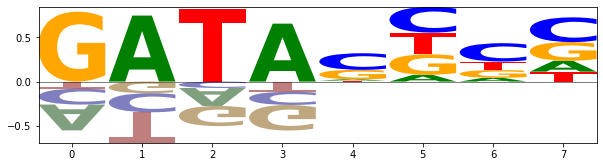

In [15]:
print(np.exp(net.log_weight_1.squeeze().cpu().detach().numpy()))
# print(np.exp(net.log_weight_2.squeeze().cpu().detach().numpy()))
#mb.tl.create_logo(net)
#plt.show()
#mb.tl.create_heatmap(net)
import logomaker
weights = net.conv_mono.weight
weights = weights.squeeze().cpu().detach().numpy()
weights = pd.DataFrame(weights)
weights.index = 'A', 'C', 'G', 'T'
crp_logo = logomaker.Logo(weights.T, shade_below=.5, fade_below=.5)

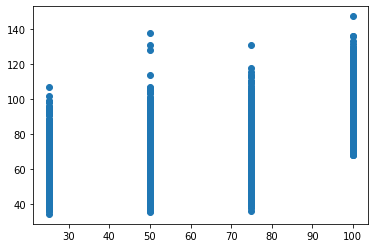

In [16]:
all_targets, all_outputs = [], []
net.eval()
with torch.no_grad():  # we don't need gradients in the testing phase
    for i, batch in enumerate(test_loader):
        # Get a batch and potentially send it to GPU memory.
        inputs, target = batch["mononuc"].to(device), batch["target"].to(device)
        output = net(inputs)
        all_outputs.append(output.squeeze().cpu().detach().numpy())
        all_targets.append(target)
        # print(target)
        # print(output)
plt.scatter(np.array(all_targets), np.array(all_outputs))

54.80211
57.30181
64.11836
88.83164


<AxesSubplot:>

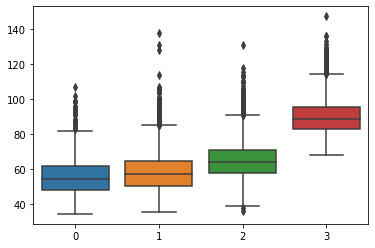

In [17]:
print(np.median(np.array(all_outputs)[np.array(all_targets) == 25]))
print(np.median(np.array(all_outputs)[np.array(all_targets) == 50]))
print(np.median(np.array(all_outputs)[np.array(all_targets) == 75]))
print(np.median(np.array(all_outputs)[np.array(all_targets) == 100]))
sns.boxplot(data=(np.array(all_outputs)[np.array(all_targets) == 25], np.array(all_outputs)[np.array(all_targets) == 50], np.array(all_outputs)[np.array(all_targets) == 75], np.array(all_outputs)[np.array(all_targets) == 100]))